In [1]:
%matplotlib inline
from google.colab import files

In [3]:
#Uploading picture
uploaded=files.upload()

Saving Madhav_Taj.jpeg to Madhav_Taj.jpeg


Automatically created module for IPython interactive environment
Shape of the image is: (1599, 1280, 3)
Shape of the image is: (2046720, 3)
Fitting model on a small sub-sample of the data
done in 1.819s.
Predicting color indices on the full image (k-means)
done in 5.412s.
Predicting color indices on the full image (random)
done in 8.531s.


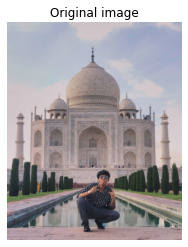

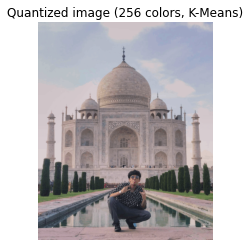

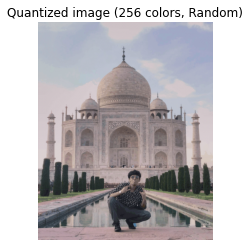

In [4]:
print(__doc__)
from PIL import Image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time

n_colors = 256

# Load the image
def read_image(file_name):
    return io.imread(file_name, as_gray = False)
img = read_image("Madhav_Taj.jpeg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
img = np.array(img, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
print('Shape of the image is:' , img.shape)
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))
print('Shape of the image is:' , image_array.shape)

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (256 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))


plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (256 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()